# Questions:
### What is the best way to optimize a story based on metrics?
### What Metrics are most important for upvotes and following conversations?

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [34]:
df = pd.read_excel('storiesDB.xlsx')
df.sample(5)

id             subreddit        date time_of_day  title_length  \
12977  dfhdsr            confession  10-09-2019     Morning           168   
4387   lcu0vl    CasualConversation  02-04-2021     Evening            69   
12853  i27kh5   TalesFromYourServer  08-02-2020    Midnight            78   
21524  cz8v0s   UnresolvedMysteries  09-03-2019   Afternoon            70   
9952   nkm8u0  talesfromtechsupport  05-25-2021     Morning            76   

       title_word_count  title_avg_word_length  title_syllables  \
12977                33                  4.121               41   
4387                 14                  4.000               16   
12853                15                  3.933               19   
21524                11                  5.000               15   
9952                 17                  3.471               21   

       title_reading_score  title_reading_grade  ... amount_sentences  \
12977                71.82  14th and 15th grade  ...                5   
4387                 99.57    5th and 6th grade  ...                8   
12853                74.19    6th and 7th grade  ...               22   
21524                77.23    5th and 6th grade  ...               48   
9952                 88.06    5th and 6th grade  ...               35   

       avg_words_per_sentence  avg_syllables_per_sentence  \
12977                  26.000                      31.800   
4387                   20.000                      24.125   
12853                  17.500                      22.455   
21524                  22.938                      33.479   
9952                   13.743                      18.000   

       avg_polarity_per_sentence  avg_subjectivity_per_sentence  \
12977                     -0.033                          0.374   
4387                       0.185                          0.481   
12853                      0.094                          0.367   
21524                      0.043                          0.172   
9952                       0.055                          0.302   

       avg_readscore_per_sentence  num_comments  upvotes upvote_ratio  \
12977                      75.546           166    10195         0.97   
4387                       85.862           123     7250         0.98   
12853                      74.380           177     2805         0.98   
21524                      46.823           477     4294         0.97   
9952                       86.138           254     2949         0.99   

      downvotes  
12977       315  
4387        147  
12853        57  
21524       132  
9952         29  

[5 rows x 32 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22722 entries, 0 to 22721
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             22722 non-null  object 
 1   subreddit                      22722 non-null  object 
 2   date                           22722 non-null  object 
 3   time_of_day                    22722 non-null  object 
 4   title_length                   22722 non-null  int64  
 5   title_word_count               22722 non-null  int64  
 6   title_avg_word_length          22722 non-null  float64
 7   title_syllables                22722 non-null  int64  
 8   title_reading_score            22722 non-null  float64
 9   title_reading_grade            22722 non-null  object 
 10  title_reading_difficulty       22722 non-null  object 
 11  title_polarity                 22722 non-null  float64
 12  title_subjectivity             22722 non-null 

In [36]:
df.describe()

title_length  title_word_count  title_avg_word_length  title_syllables  \
count  22722.000000      22722.000000           22722.000000     22722.000000   
mean      66.199542         12.428924               4.365949        16.587580   
std       47.515943          8.745877               1.012018        11.836946   
min        1.000000          0.000000               0.000000         0.000000   
25%       35.000000          7.000000               3.769000         9.000000   
50%       55.000000         10.000000               4.222000        14.000000   
75%       82.000000         16.000000               4.750000        21.000000   
max      300.000000         64.000000              38.000000        81.000000   

       title_reading_score  title_polarity  title_subjectivity  story_length  \
count         22722.000000    22722.000000        22722.000000  22722.000000   
mean             79.540065        0.016017            0.263346   3279.753499   
std              25.452212        0.261677            0.323674   4047.723741   
min            -470.990000       -1.000000            0.000000      1.000000   
25%              67.760000        0.000000            0.000000   1210.000000   
50%              82.650000        0.000000            0.067000   2116.000000   
75%              94.490000        0.025000            0.500000   3590.000000   
max             206.840000        1.000000            1.000000  39996.000000   

       story_word_count  story_avg_word_length  ...  amount_sentences  \
count      22722.000000           22722.000000  ...      22722.000000   
mean         613.895696               4.126624  ...         40.342311   
std          747.653560               0.444081  ...         57.619713   
min            0.000000               0.000000  ...          0.000000   
25%          229.000000               3.909000  ...         13.000000   
50%          401.000000               4.059000  ...         24.000000   
75%          673.000000               4.237000  ...         43.000000   
max         7709.000000              25.545000  ...        864.000000   

       avg_words_per_sentence  avg_syllables_per_sentence  \
count            22722.000000                22722.000000   
mean                17.526568                   22.701236   
std                 17.072659                   20.582044   
min                  0.000000                    0.000000   
25%                 13.042250                   16.583000   
50%                 16.273000                   20.922000   
75%                 20.000000                   26.077000   
max               1969.000000                 2237.000000   

       avg_polarity_per_sentence  avg_subjectivity_per_sentence  \
count               22722.000000                   22722.000000   
mean                    0.043419                       0.317529   
std                     0.084424                       0.103186   
min                    -1.000000                       0.000000   
25%                    -0.001000                       0.254000   
50%                     0.037000                       0.312000   
75%                     0.082000                       0.376000   
max                     1.000000                       1.000000   

       avg_readscore_per_sentence  num_comments        upvotes  upvote_ratio  \
count                22722.000000  22722.000000   22722.000000  22722.000000   
mean                    75.969789    573.939882    8208.830957      0.956159   
std                     42.034567   1154.060567   12108.919243      0.049234   
min                  -3431.990000      0.000000       0.000000      0.370000   
25%                     73.243250     80.000000    1239.250000      0.950000   
50%                     80.448000    198.000000    3376.000000      0.970000   
75%                     86.304000    484.000000    8920.000000      0.990000   
max                    206.840000  22821.000000  216188.000000      1.000000   

           downvotes  


In [37]:
df['title_word_count'].median()

10.0

### Fixing general errors with the dataset

In [38]:
#Basically just fixes the reading scores to be within the correct range, there as an error where the scores went beyond and thus this just keeps the data with proper read scores

rd_score_cols = ['story_reading_score', 'title_reading_score', 'avg_readscore_per_sentence']
def fix_rd_score(data, col):
    return data[(data[col] >= 0) & (data[col] < 122)]

for col in rd_score_cols:
    df = fix_rd_score(df, col)
    
df.shape
df.to_excel('storiesDB.xlsx')

In [39]:
def graph(grpby, sort_by, legend, xlbl, ylbl, title, plot):
    df.groupby(grpby).count().sort_values(by=[sort_by])['upvotes'].plot(kind=plot)
    plt.legend([legend])
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)

### Graph: Aiming to see how upvotes change depending on time of day

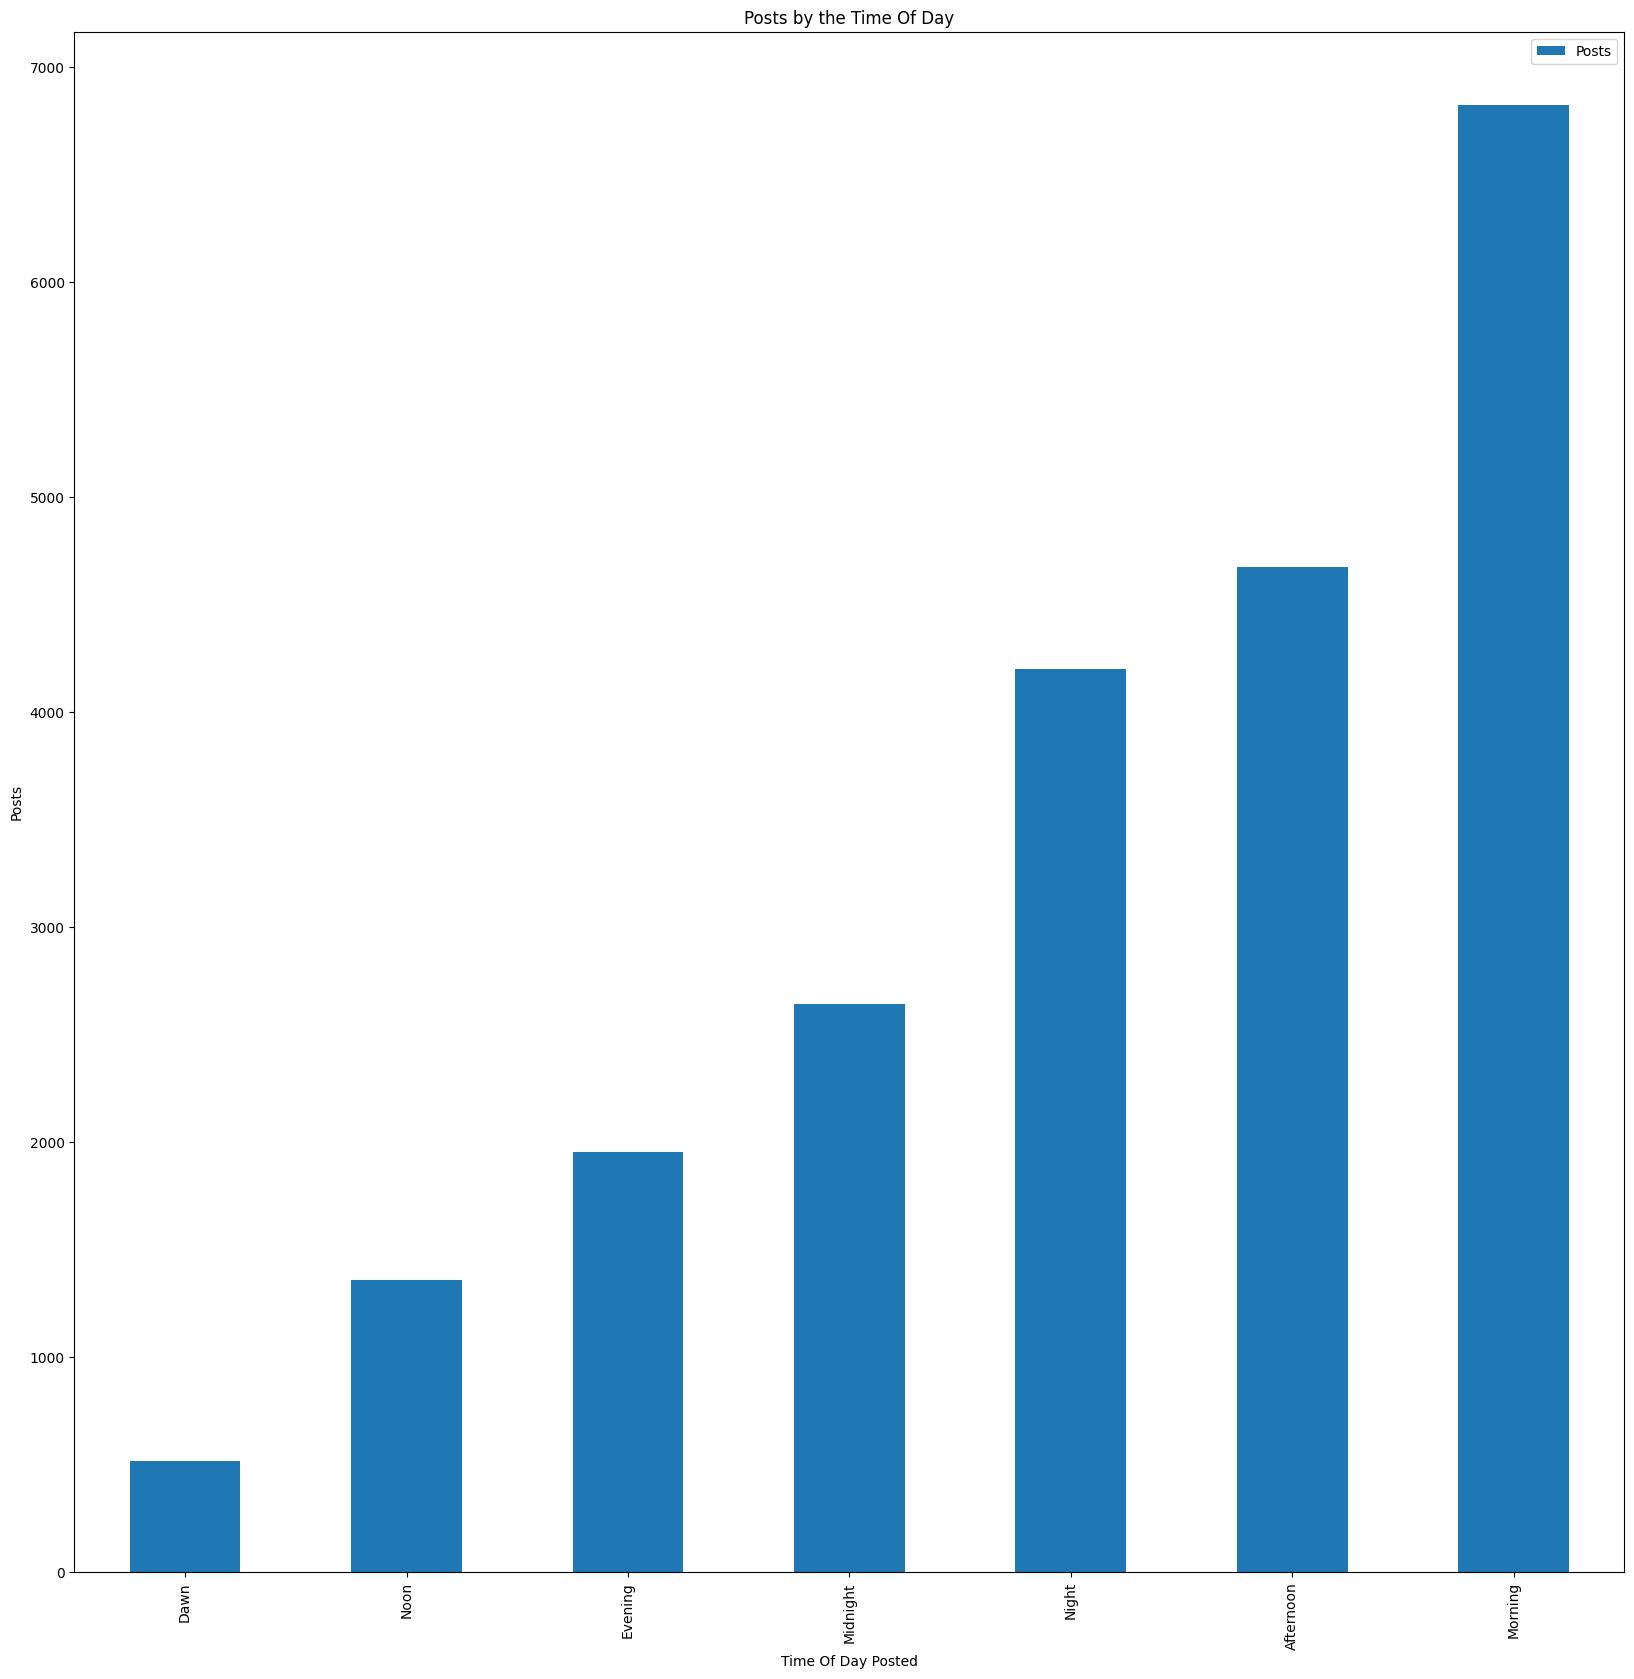

In [40]:
graph('time_of_day', 'upvotes', 'Posts', 'Time Of Day Posted', 'Posts', 'Posts by the Time Of Day', 'bar')

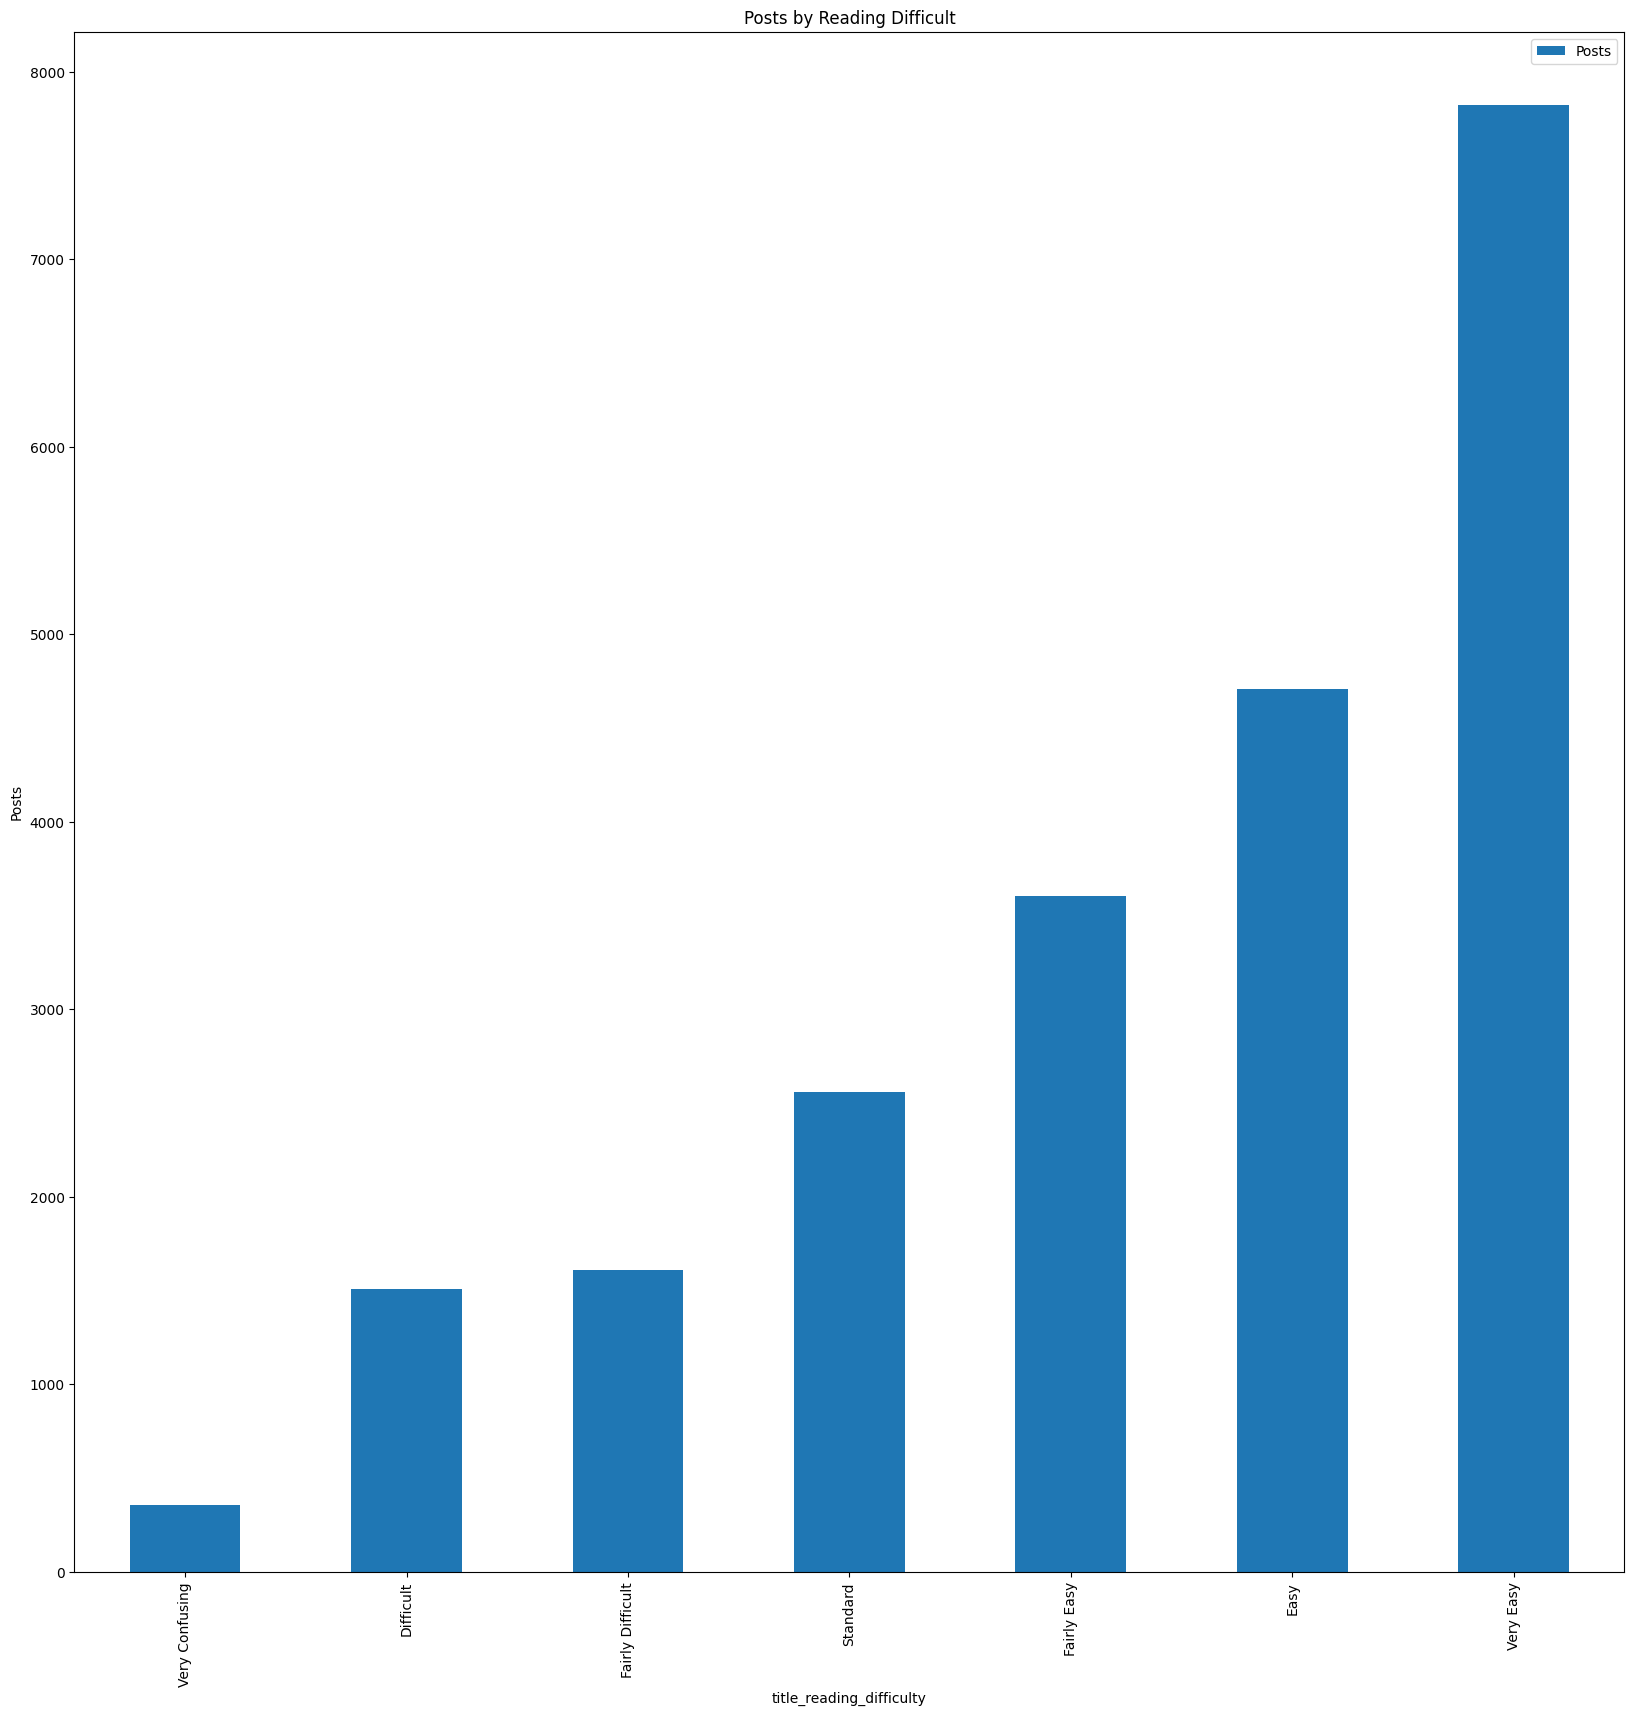

In [41]:
graph('title_reading_difficulty', 'upvotes', 'Posts', 'title_reading_difficulty', 'Posts', 'Posts by Reading Difficult', 'bar')

# Correlation of df

In [42]:
df.corr(numeric_only=True)

title_length  title_word_count  \
title_length                       1.000000          0.981017   
title_word_count                   0.981017          1.000000   
title_avg_word_length             -0.002125         -0.142968   
title_syllables                    0.990260          0.972944   
title_reading_score               -0.228024         -0.120409   
title_polarity                     0.030933          0.037177   
title_subjectivity                 0.176591          0.175193   
story_length                       0.113318          0.105586   
story_word_count                   0.092077          0.088101   
story_avg_word_length              0.302976          0.242472   
story_syllables                    0.111662          0.104487   
story_reading_score               -0.347038         -0.300844   
story_polarity                     0.061944          0.063293   
story_subjectivity                -0.027597         -0.015877   
amount_sentences                   0.014549          0.016150   
avg_words_per_sentence             0.146537          0.143227   
avg_syllables_per_sentence         0.192613          0.180040   
avg_polarity_per_sentence          0.071758          0.072933   
avg_subjectivity_per_sentence      0.074689          0.083312   
avg_readscore_per_sentence        -0.337187         -0.295054   
num_comments                       0.176413          0.166226   
upvotes                            0.161831          0.160523   
upvote_ratio                      -0.211332         -0.201829   
downvotes                          0.148612          0.138192   

                               title_avg_word_length  title_syllables  \
title_length                               -0.002125         0.990260   
title_word_count                           -0.142968         0.972944   
title_avg_word_length                       1.000000        -0.003130   
title_syllables                            -0.003130         1.000000   
title_reading_score                        -0.666983        -0.290690   
title_polarity                             -0.033628         0.029470   
title_subjectivity                         -0.002262         0.177479   
story_length                                0.013067         0.108462   
story_word_count                            0.003334         0.087962   
story_avg_word_length                       0.202010         0.295396   
story_syllables                             0.011533         0.107536   
story_reading_score                        -0.136105        -0.350022   
story_polarity                             -0.019936         0.063042   
story_subjectivity                         -0.035031        -0.025305   
amount_sentences                           -0.003306         0.011624   
avg_words_per_sentence                     -0.003818         0.148516   
avg_syllables_per_sentence                  0.026096         0.195291   
avg_polarity_per_sentence                  -0.017921         0.072544   
avg_subjectivity_per_sentence              -0.027551         0.079908   
avg_readscore_per_sentence                 -0.125088        -0.339681   
num_comments                                0.021543         0.191699   
upvotes                                    -0.007266         0.185854   
upvote_ratio                               -0.006443        -0.221695   
downvotes                                   0.021246         0.163777   

                               title_reading_score  title_polarity  \
title_length                             -0.228024        0.030933   
title_word_count                         -0.120409        0.037177   
title_avg_word_length                    -0.666983       -0.033628   
title_syllables                          -0.290690        0.029470   
title_reading_score                       1.000000        0.020816   
title_polarity                            0.020816        1.000000   
title_subjectivity                       -0.066145       -0.028241   
story_length       

# Heat Map of Correlations

Heat map doesn't seem to show anything too significant, it seems that most the relationships are nonlinear. There a relationships, but nothing with the success metrics.

In [43]:
def heatmap(data):
    plt.rcParams['figure.figsize'] = (20, 20)
    sns.heatmap(data.corr(numeric_only=True).apply(lambda x: round(x, 3)), annot=True, cmap='coolwarm')
    plt.show()

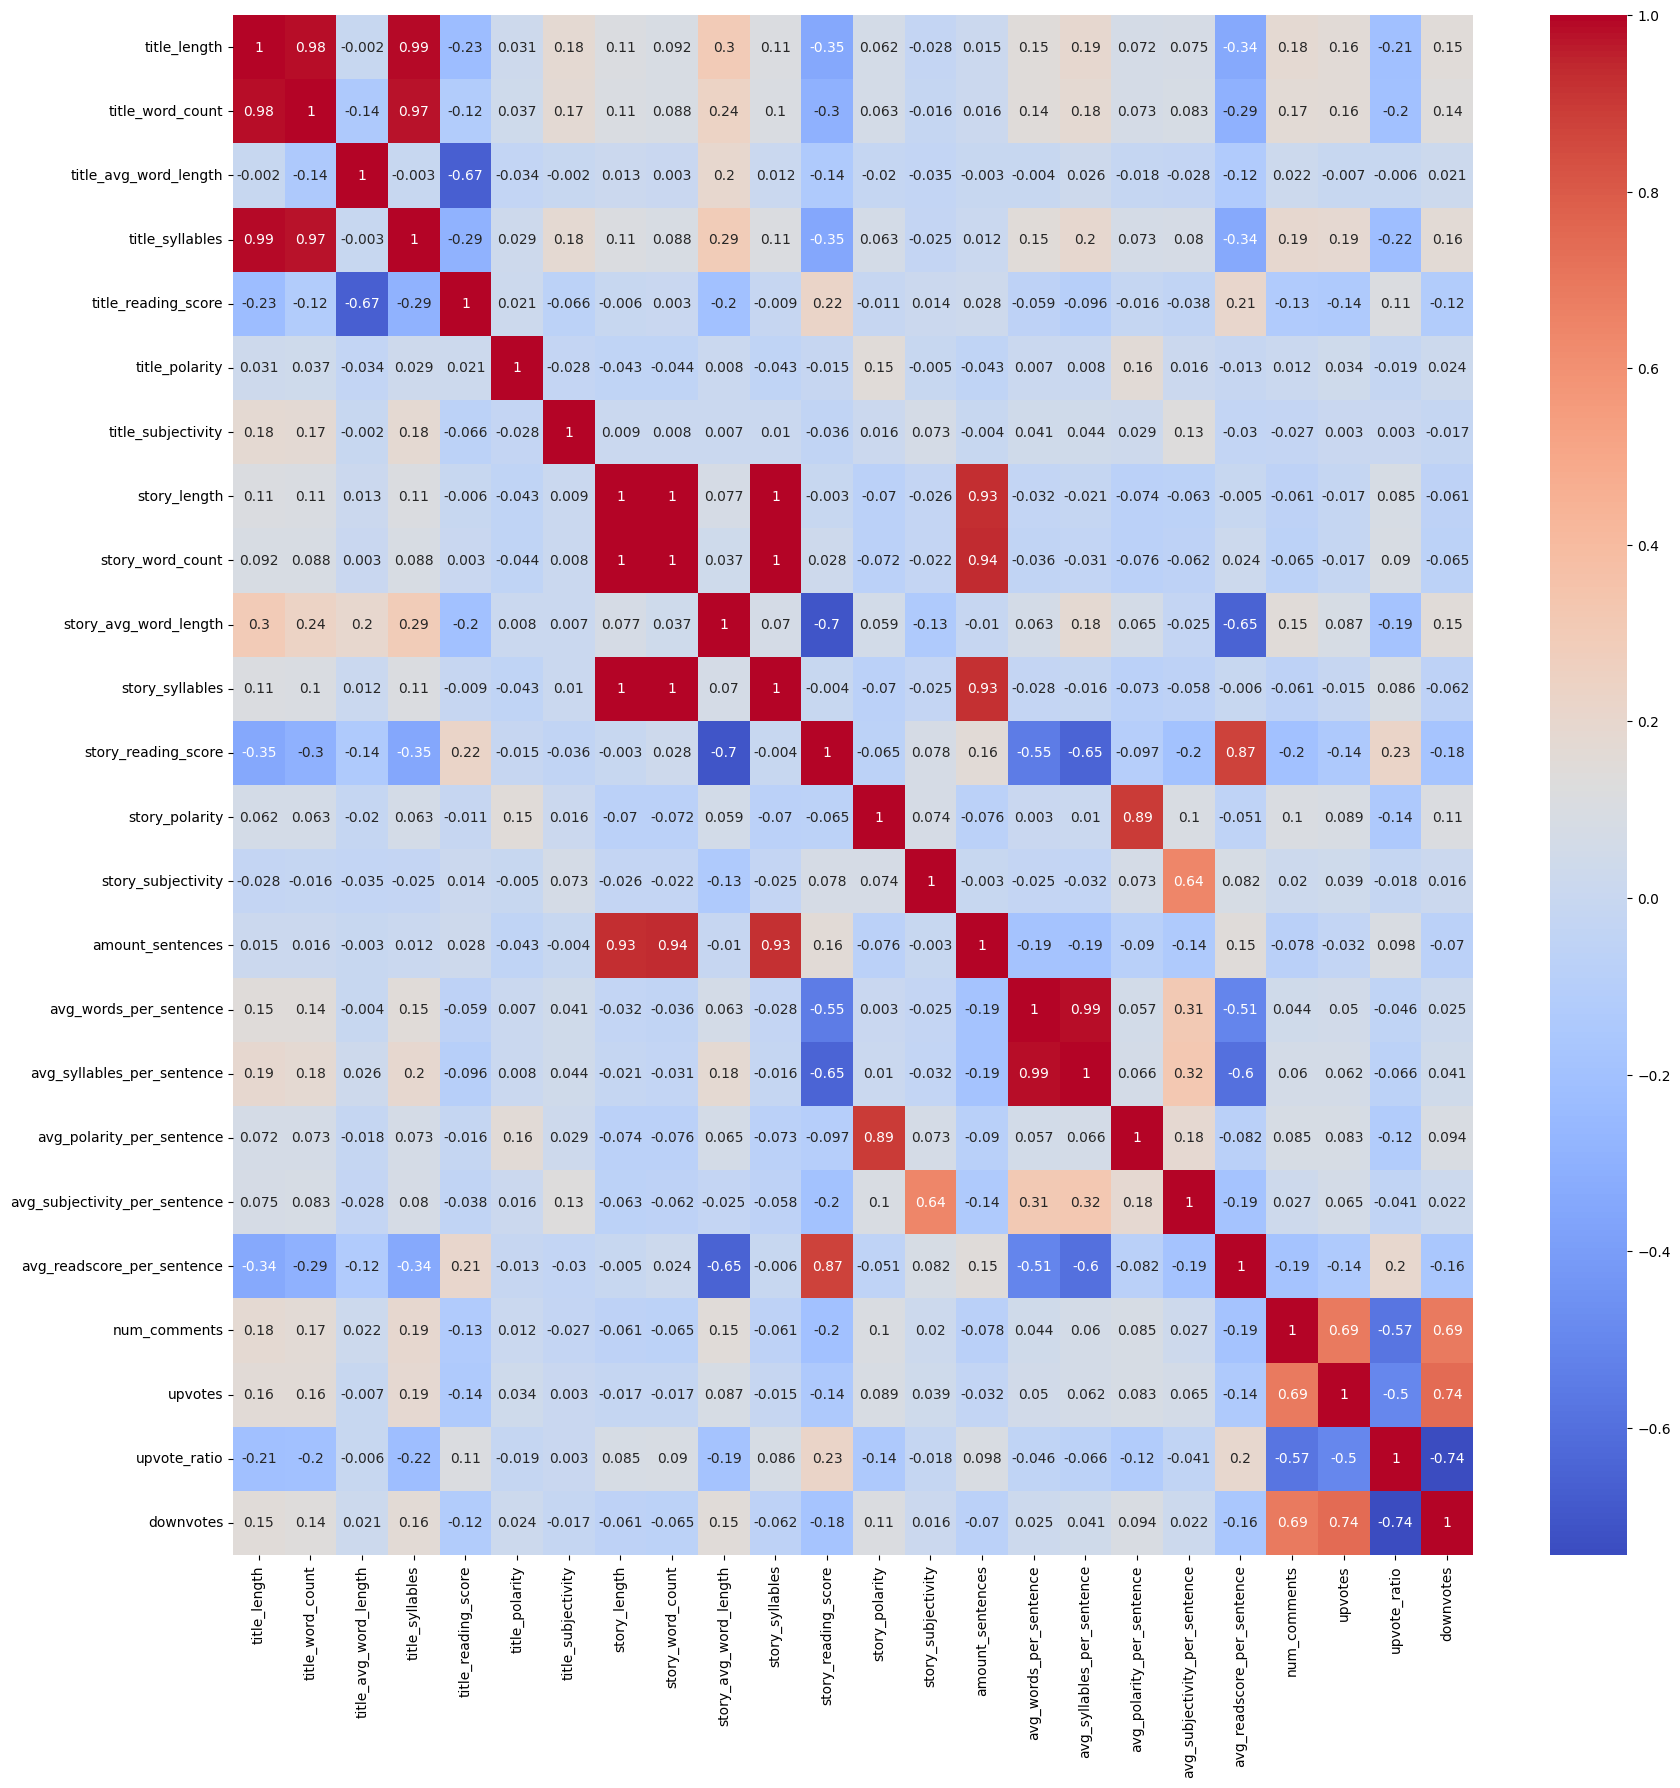

In [44]:
heatmap(df)

In [45]:
success_metrics = ['num_comments', 'upvotes', 'downvotes']
numerical_columns = [col for col in df.select_dtypes(include='number').columns.tolist() if col not in success_metrics]
df.columns

Index(['id', 'subreddit', 'date', 'time_of_day', 'title_length',
       'title_word_count', 'title_avg_word_length', 'title_syllables',
       'title_reading_score', 'title_reading_grade',
       'title_reading_difficulty', 'title_polarity', 'title_subjectivity',
       'story_length', 'story_word_count', 'story_avg_word_length',
       'story_syllables', 'story_reading_score', 'story_reading_grade',
       'story_reading_difficulty', 'story_polarity', 'story_subjectivity',
       'amount_sentences', 'avg_words_per_sentence',
       'avg_syllables_per_sentence', 'avg_polarity_per_sentence',
       'avg_subjectivity_per_sentence', 'avg_readscore_per_sentence',
       'num_comments', 'upvotes', 'upvote_ratio', 'downvotes'],
      dtype='object')

In [46]:
def normalize_df(data, cols, metrics, eps, kind):
    result = pd.DataFrame()
    if kind == 1:
        result[cols] = data[cols] + eps
        result = np.log1p(result[cols])
    elif kind == 2:
        result[cols] = data[cols].map(lambda x: x if x >= 0 else eps)
        result = np.sqrt(result[cols])
    elif kind == 3:
        result[cols] = data[cols]
        result = np.cbrt(result[cols])
        
    result[metrics] = data[metrics]
    
    return result

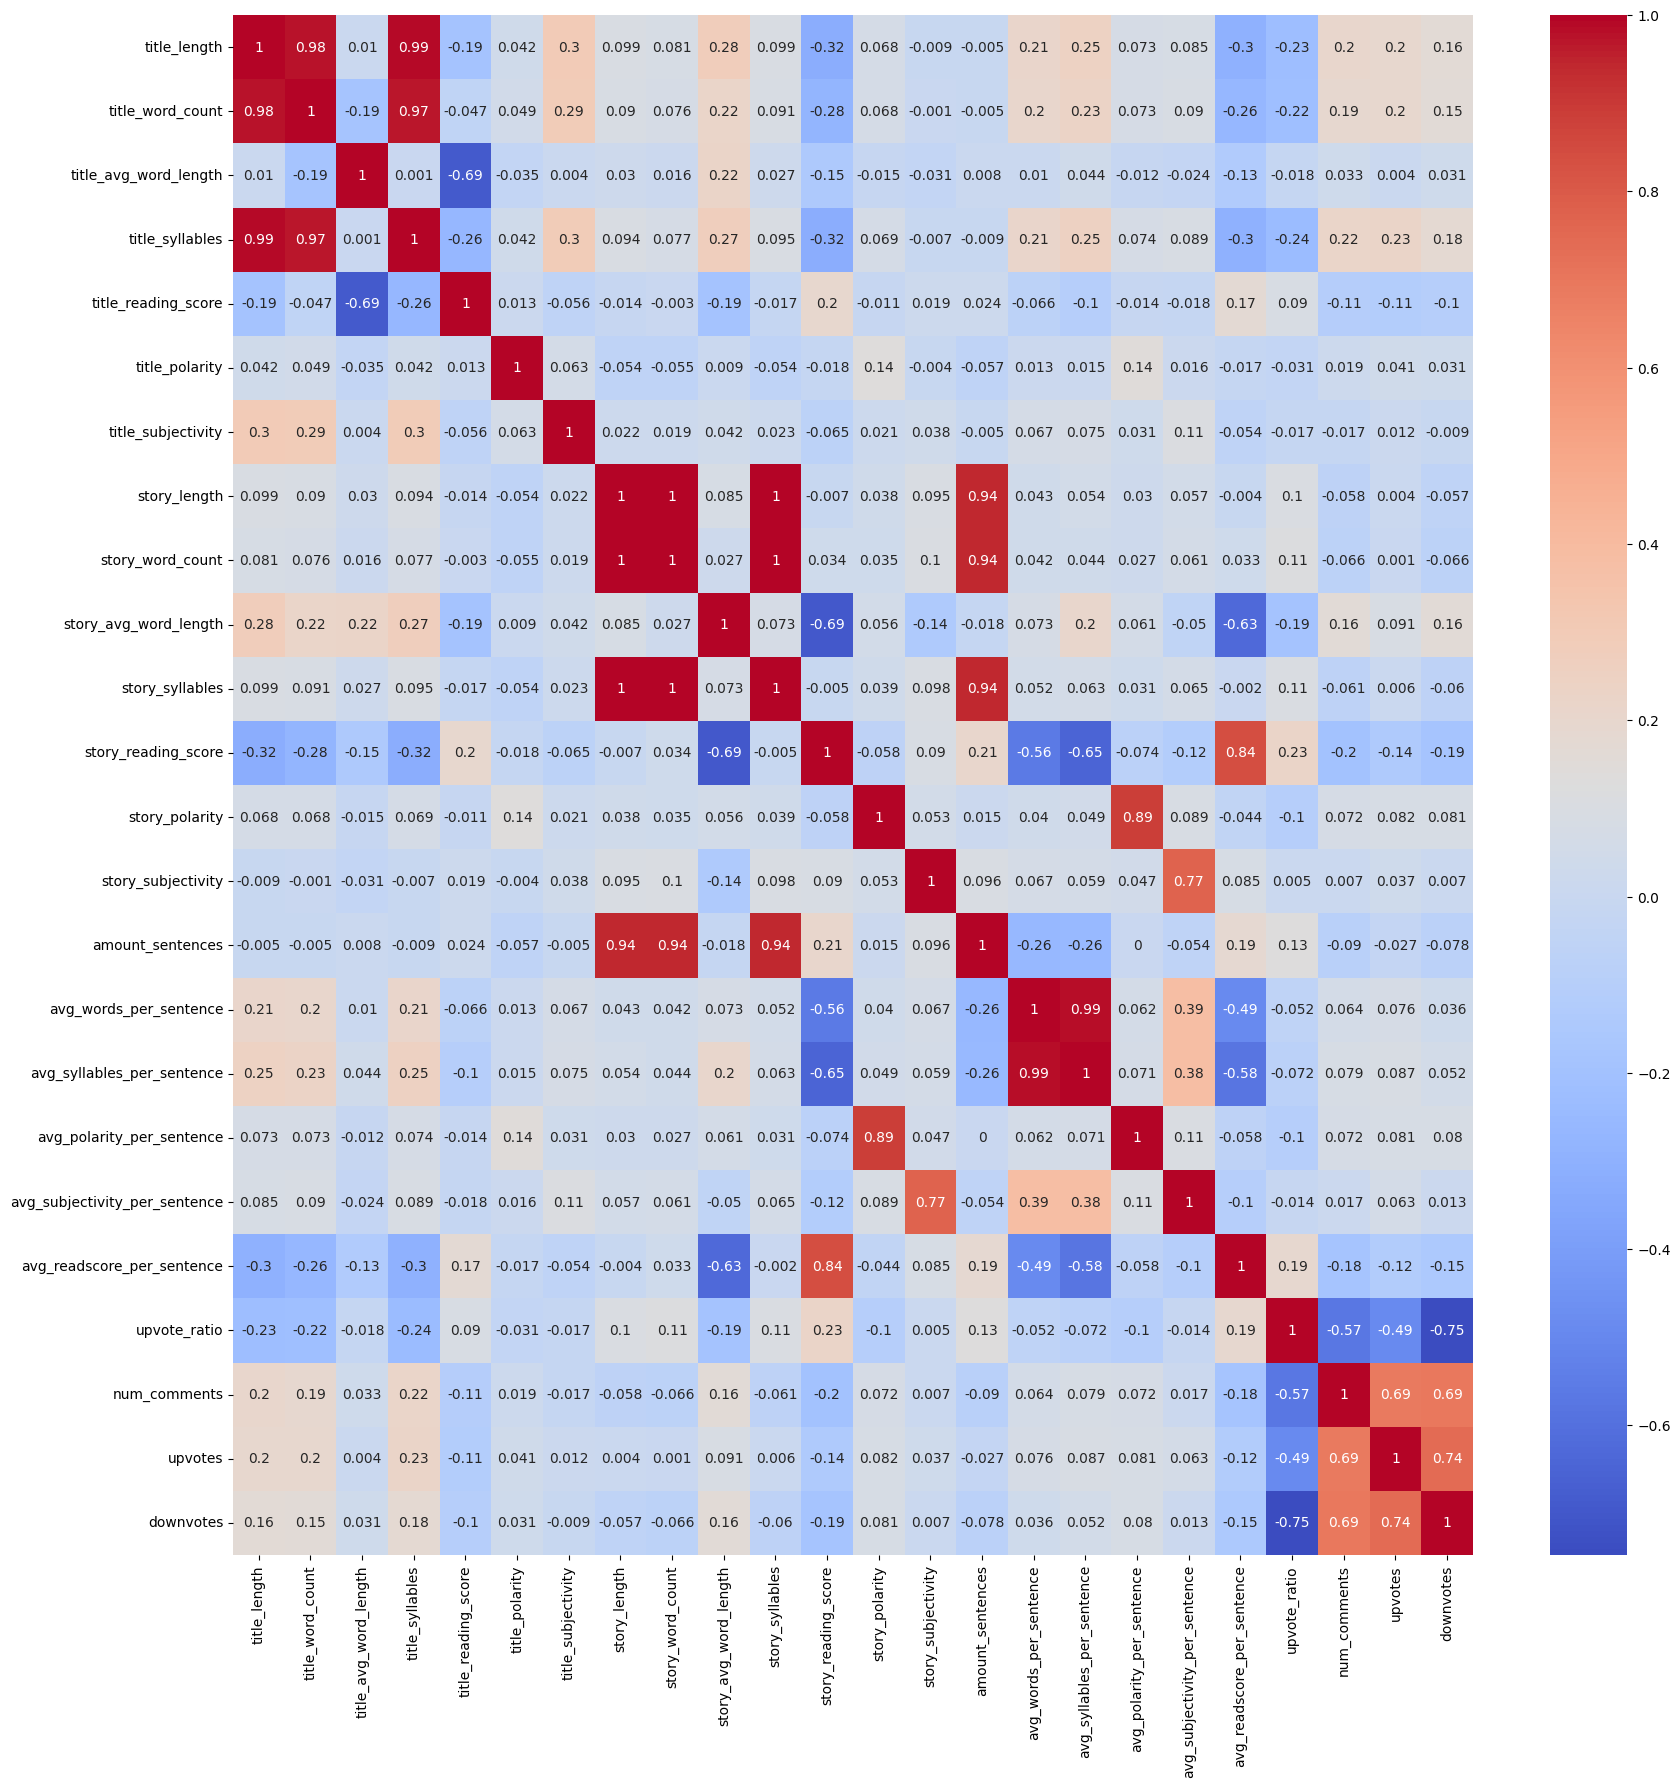

In [47]:
#Heatmap of the cube rooted metrics
cbrt_df = normalize_df(df, numerical_columns, success_metrics, 1e-20, 3)
heatmap(cbrt_df)

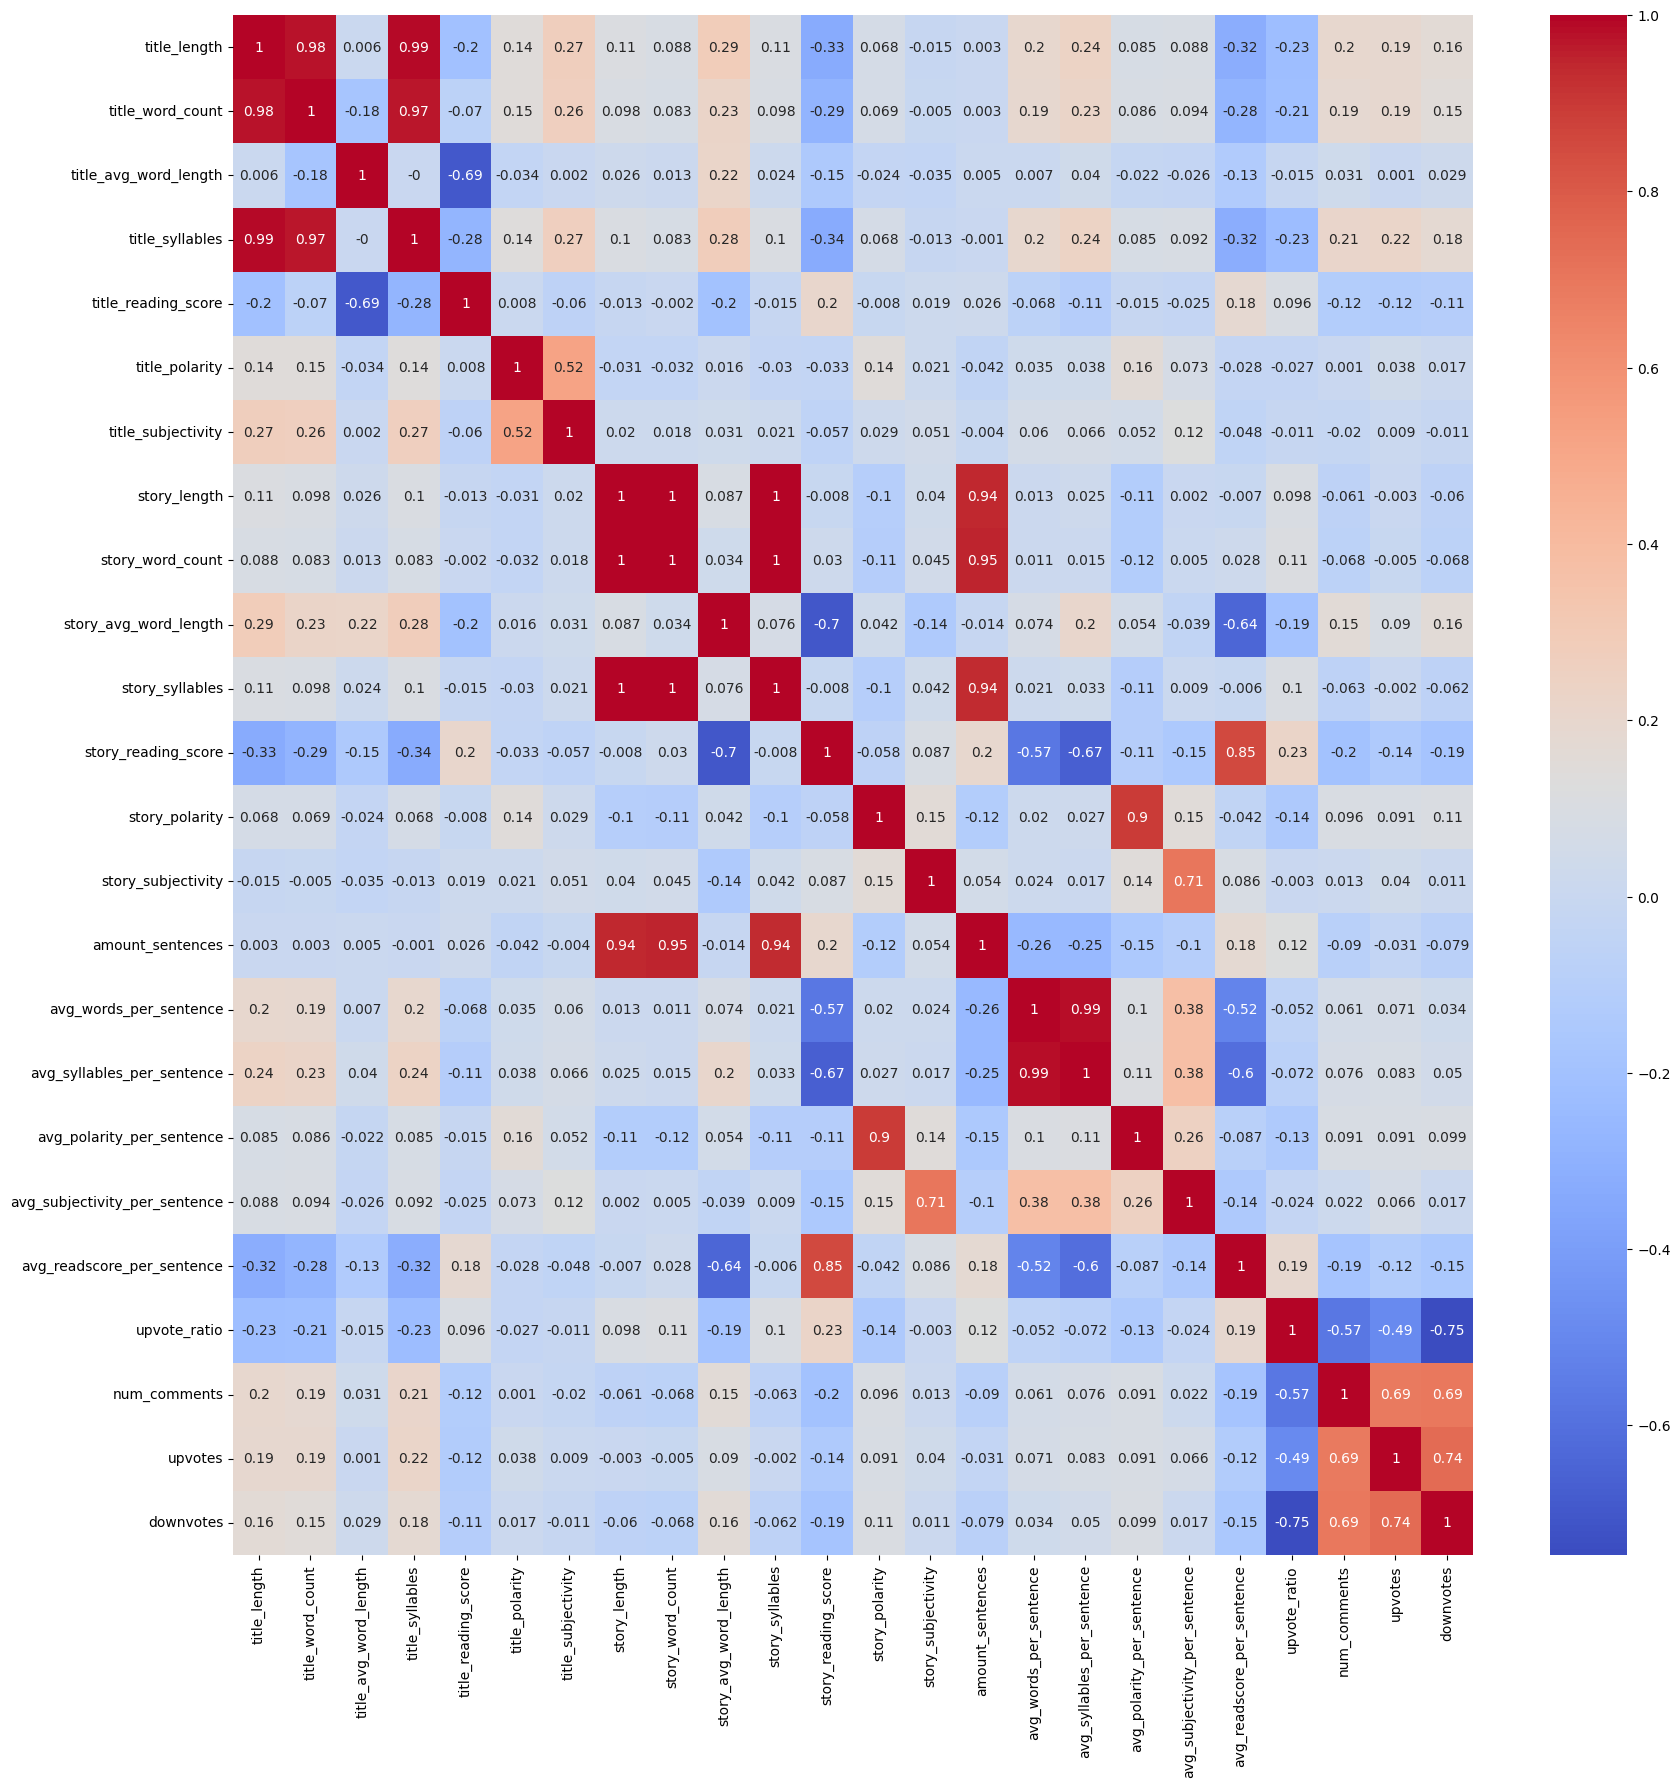

In [48]:
#Heatmap of the square rooted metrics
sqrt_df = normalize_df(df, numerical_columns, success_metrics, 1e-20, 2)
heatmap(sqrt_df)

k:\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


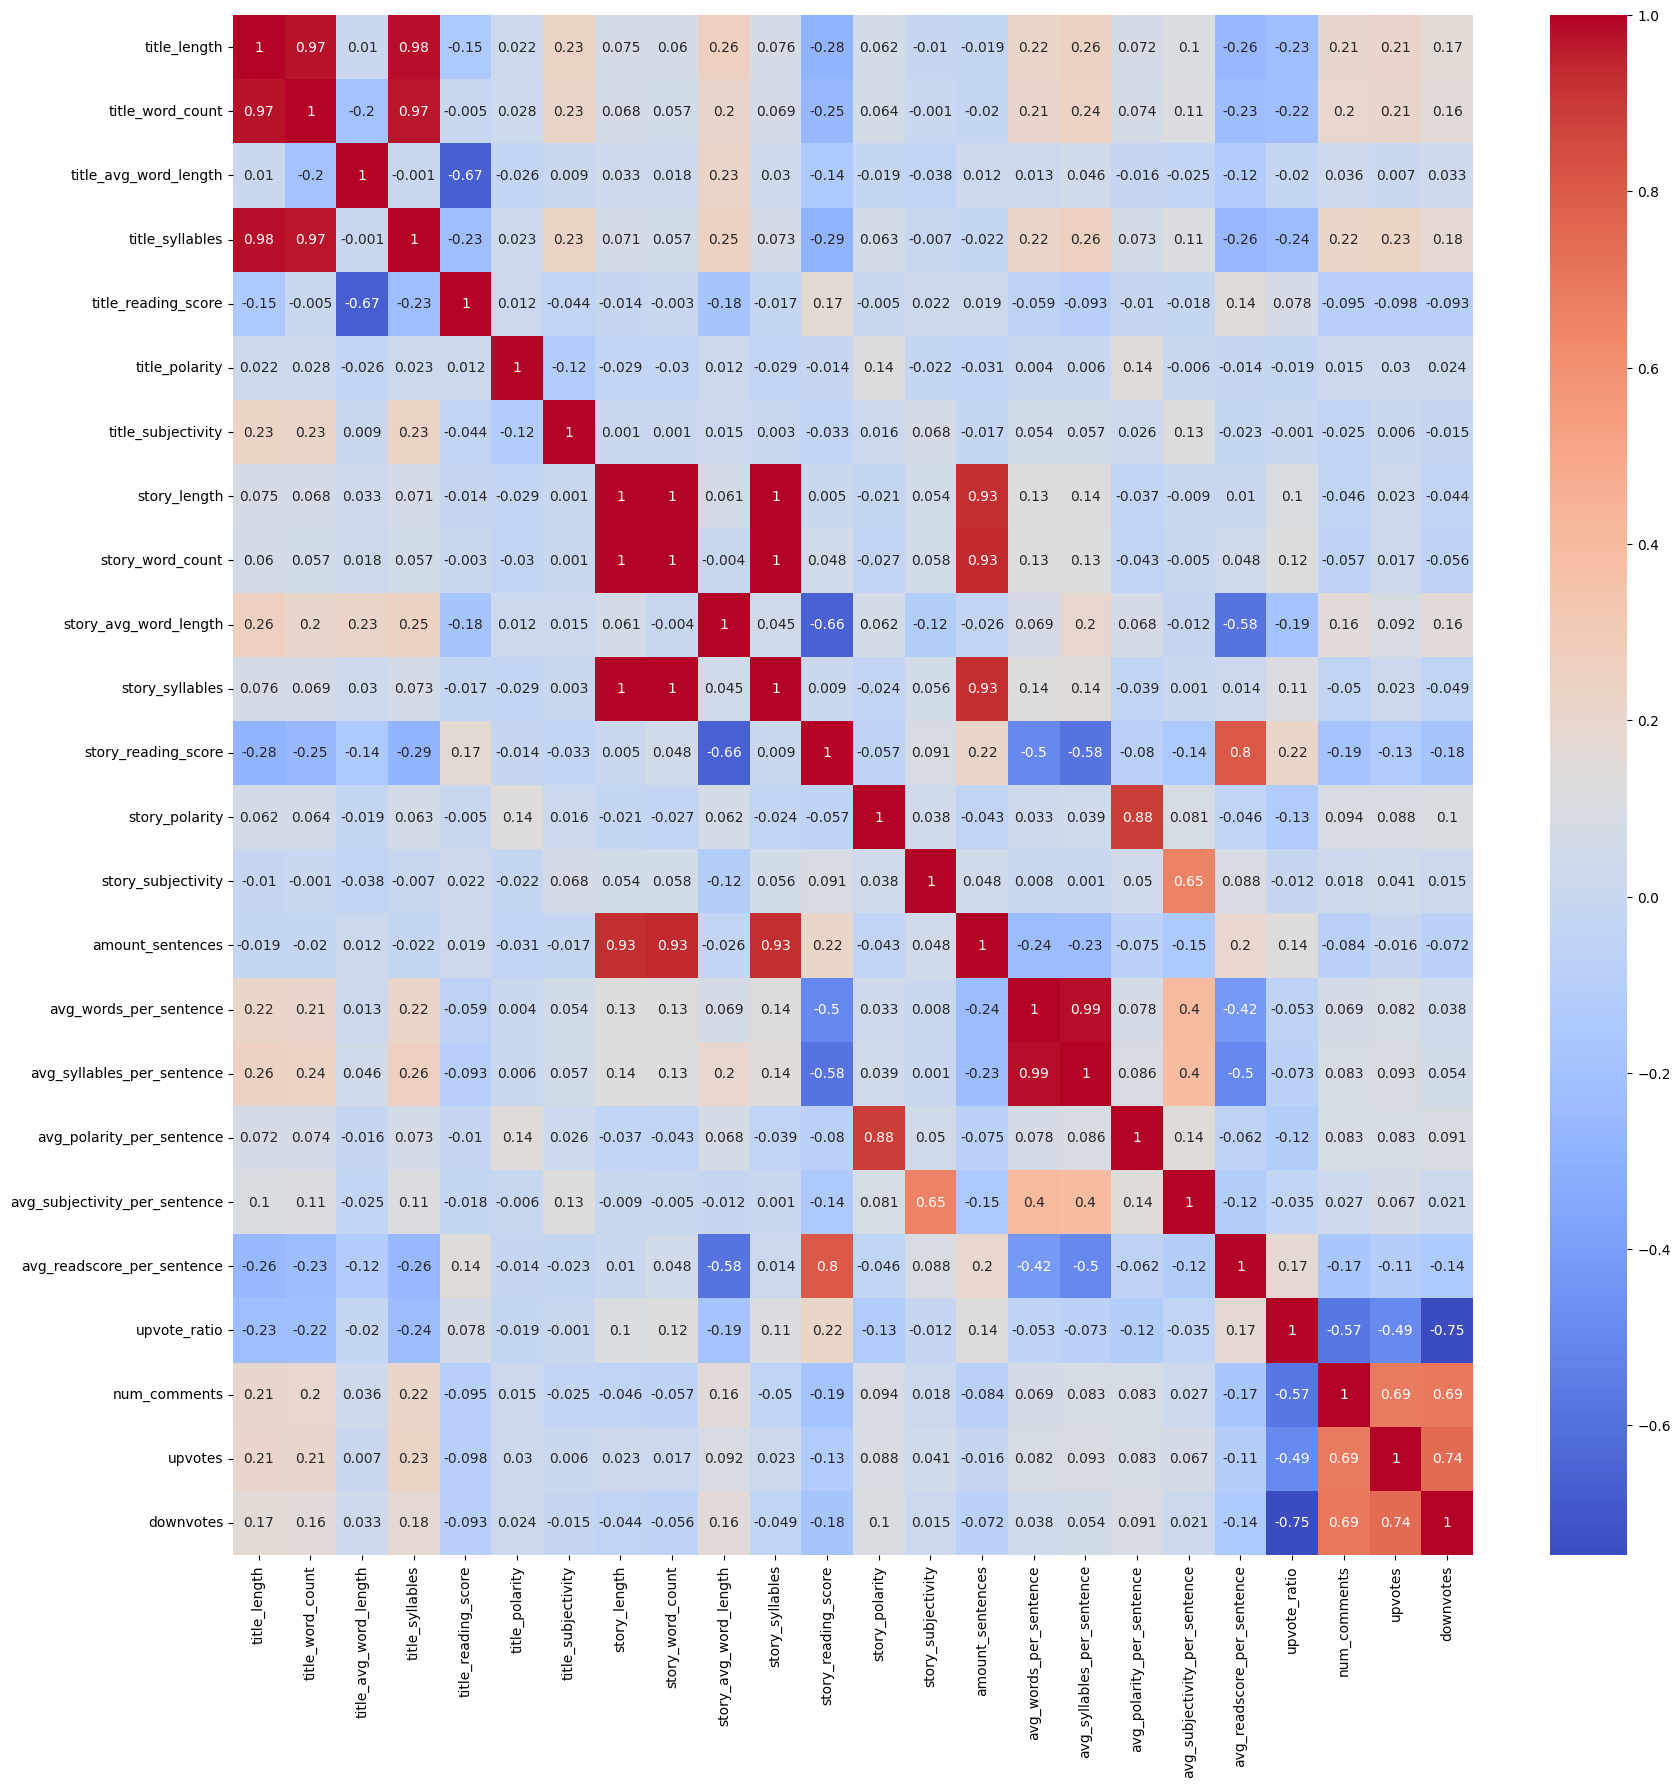

In [49]:
#Heatmap of the log'd metrics
log_df = normalize_df(df, numerical_columns, success_metrics, 1e-20, 1)
heatmap(log_df)

### General plots between success metrics and other variables

In [50]:
def plot(data, xvars, yvars):
    sns.pairplot(
        data,
        x_vars=xvars,
        y_vars=yvars,
    )   

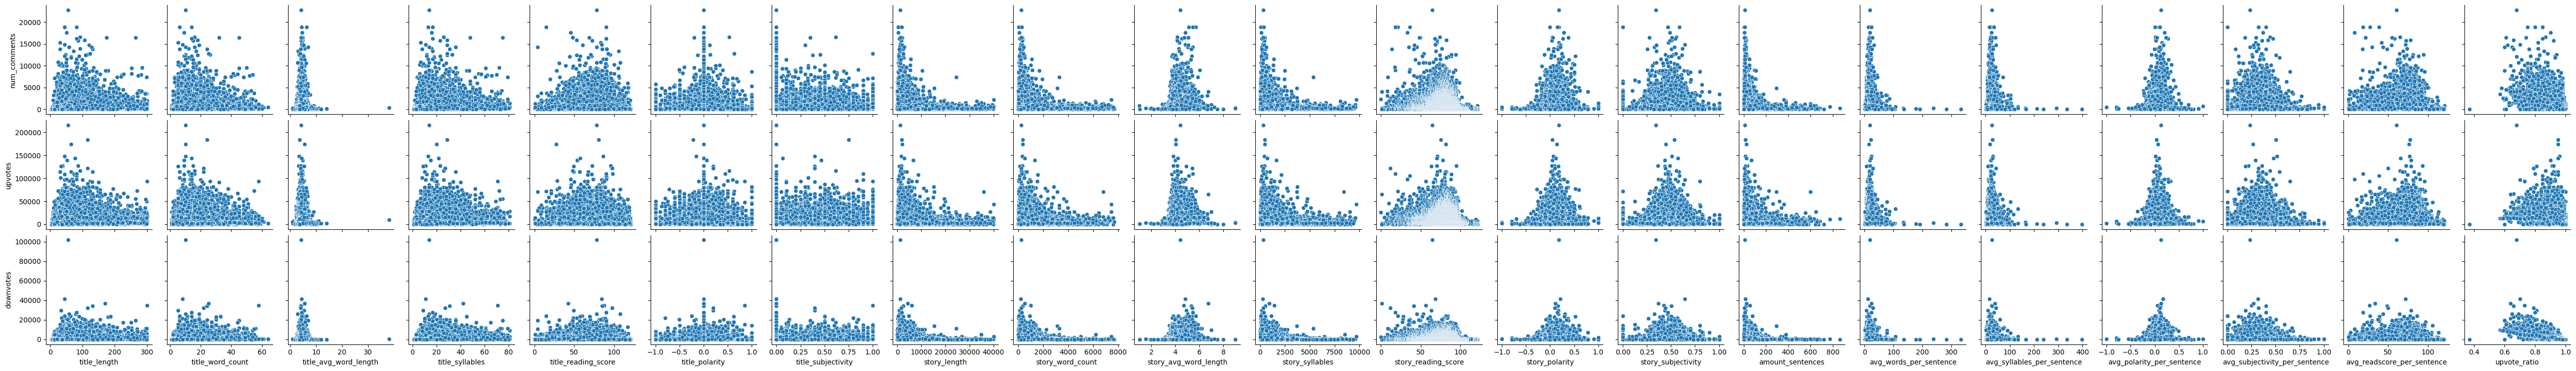

In [51]:
plot(df, numerical_columns, success_metrics)

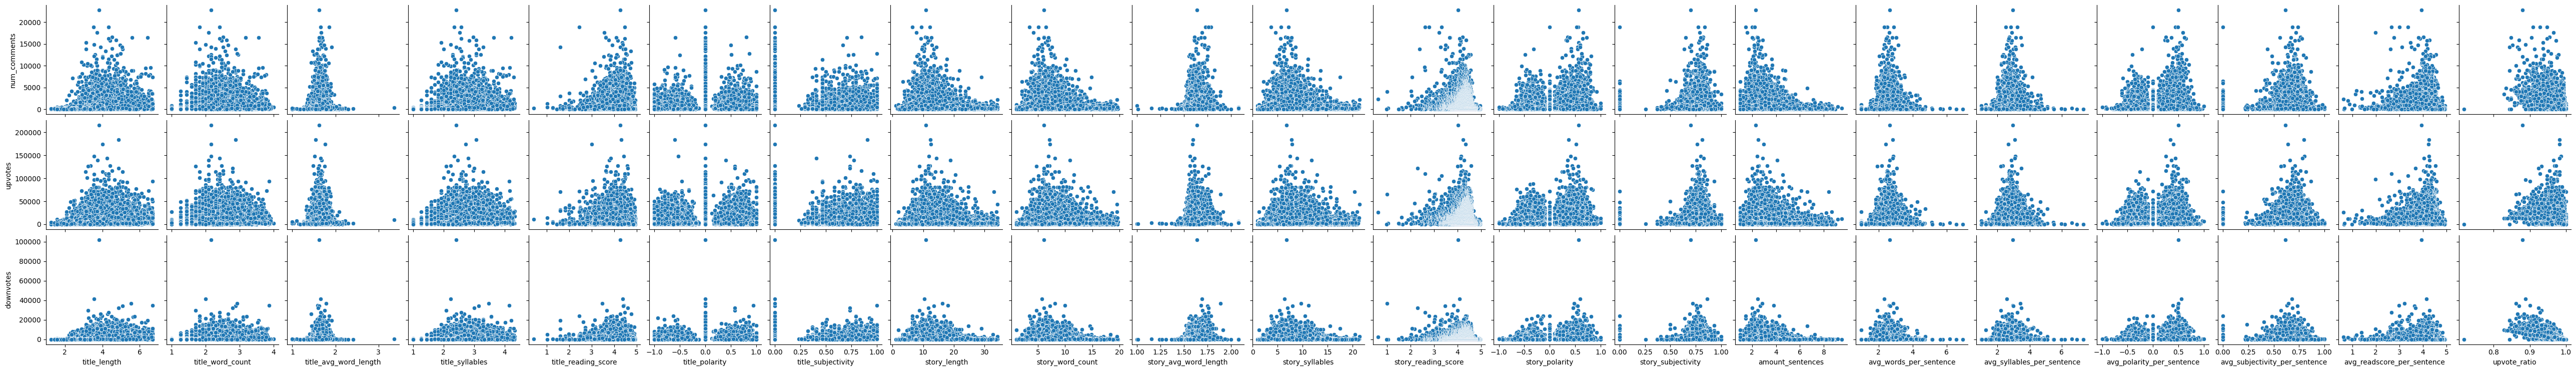

In [52]:
plot(cbrt_df, numerical_columns, success_metrics)

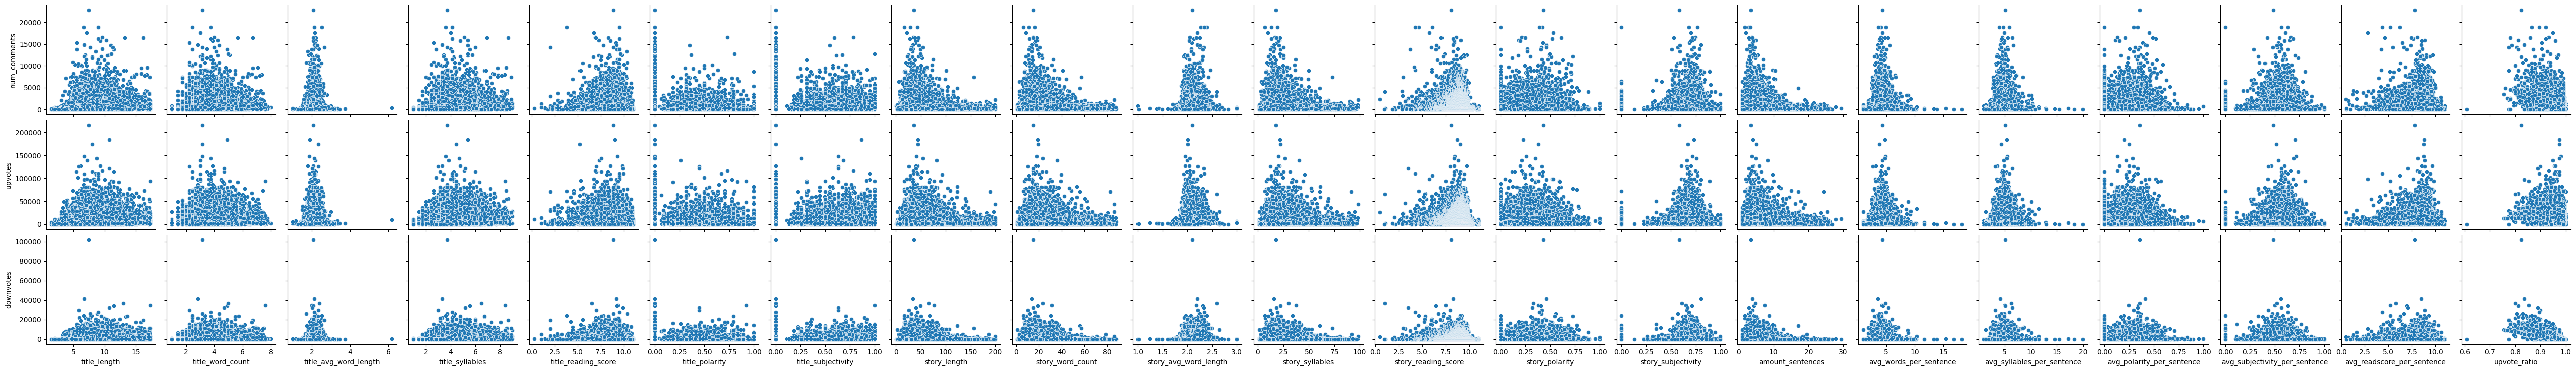

In [53]:
plot(sqrt_df, numerical_columns, success_metrics)

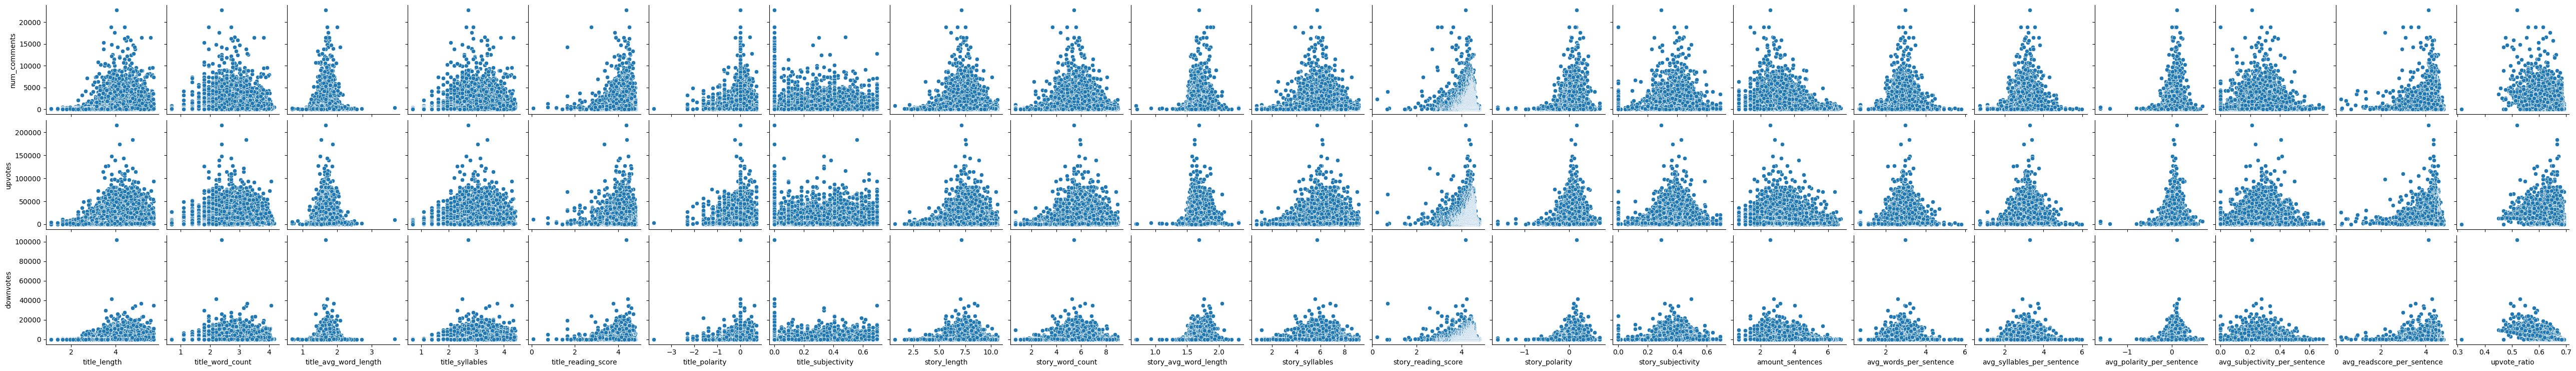

In [54]:
plot(log_df, numerical_columns, success_metrics)

General impressions:
- There seems to be a lot of skew within the data, most relationships are nonlinear, if not all.
- The plots of upvotes, comments, and downvotes all look relatively the same and so one can be just utilized in order apply to all. 
- Given that applying square root, cube root, and logs on the data doesn't normalize them properly, we can assume we will have to assume most the data is non-normal and non-linear, thus this should be factored into the the analysis.
- A/B Testing will be done in order to handle the question of: "What is the best way to optimize a story based on metrics?"

# A/B Test: Function

In [55]:
import pingouin as pg

def choose_lower(num1, num2):
    return int(len(num1)) if len(num1) < len(num2) else int(len(num2))

def is_normal(data, has_col, col=None):
    return pg.normality(data[col])['normal'].iloc[0] if has_col else pg.normality(data)['normal'].iloc[0]

def calculate_sample_size(effect_size, alpha=0.05, power=0.8):
    return pg.power_ttest(d=effect_size, alpha=alpha, power=power)  

def calculate_effect_size(data, variable, success_metric, is_normal):
    median = data[variable].median()
    lower_group = data[data[variable] <= median][success_metric]
    upper_group = data[data[variable] > median][success_metric]
    
    effect_size = pg.compute_effsize(lower_group, upper_group, eftype='cohen' if is_normal else 'pointbiserialr')
    return effect_size

def ab_test(data, variable, success_metric, alpha=0.05, power=0.8):
    effect_size = calculate_effect_size(data, variable, success_metric, is_normal(data, True, success_metric))
    sample_size = calculate_sample_size(effect_size, alpha, power)
    
    median = data[variable].median()
    lower_bound = data[data[variable] <= median]
    upper_bound = data[data[variable] > median]
    
    sample_size = int(sample_size) if sample_size < len(lower_bound) and sample_size < len(upper_bound) else choose_lower(lower_bound, upper_bound)
    lower_sample = lower_bound[success_metric].sample(n=min(len(lower_bound), sample_size), random_state=1)
    upper_sample = upper_bound[success_metric].sample(n=min(len(upper_bound), sample_size), random_state=1)
    
    lower_normality = is_normal(lower_sample, False)
    upper_normality = is_normal(upper_sample, False)
    is_equal_variance = pg.homoscedasticity([lower_sample.tolist(), upper_sample.tolist()])['pval'].iloc[0] > alpha
    is_mwu = None
    
    if lower_normality and upper_normality and is_equal_variance:
        test_result = pg.ttest(lower_sample, upper_sample)
        is_mwu = False
    else:
        test_result = pg.mwu(lower_sample, upper_sample)
        is_mwu = True
    
    return {
        'uval': test_result['U-val'].iloc[0],
        'pval': test_result['p-val'].iloc[0],
        'rbc': test_result['RBC'].iloc[0],
        'cles': test_result['CLES'].iloc[0],
        'efsize': effect_size
    } if is_mwu else {
        'tval': test_result['T'].iloc[0],
        'pval': test_result['p-val'].iloc[0],
        'conf_interval': test_result['CI95%'].iloc[0],
        'cohen': test_result['cohen-d'].iloc[0],
        'efsize': effect_size
    }




In [56]:
upvote_ab_results = {col: ab_test(df, col, 'upvotes') for col in numerical_columns[:-1]}
comment_ab_results = {col: ab_test(df, col, 'num_comments') for col in numerical_columns[:-1]}
downvote_ab_results = {col: ab_test(df, col, 'downvotes') for col in numerical_columns[:-1]}

k:\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
k:\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [57]:
def handle_efsize(efsize):
    if efsize <= 0.2:
        return 'small effect'
    elif 0.2 < efsize <= 0.5:
        return 'moderate effect'
    else:
        return 'large effect'
    
def handle_rbc(rbc):
    if rbc <= 0.1:
        return 'weak correlation'
    elif 0.1 < rbc <= 0.3:
        return 'moderate correlation'
    elif 0.3 < rbc <= 0.5:
        return 'strong correlation'
    else:
        return 'very strong correlation'

def interpret_ab(data, results, success_metric, alpha = 0.05):
    rows = []
    for key, val in results.items():
        lower_range = f'{round(data[key].quantile(.01), 3)}-{round(data[key].median(), 3)}'
        upper_range = f'{round(data[key].median(), 3)}-{round(data[key].quantile(.99), 3)}'
        
        uval = val['uval']
        pval = val['pval']
        rbc = val['rbc']
        cles = val['cles']
        efsize = val['efsize']
        is_stat_sig = pval < alpha
        
        effect_size_desc = handle_efsize(efsize)
        rbc_desc = handle_rbc(abs(rbc))
        cles_perc = cles * 100
        
        if is_stat_sig:
            conclusion = f'Statistically significant effect on {success_metric}'
        else:
            conclusion = f'No statistically significant effect on {success_metric}'
        
        optimal_range = (str(lower_range) if efsize < 0 else str(upper_range)) if is_stat_sig else 'N/A'
        
        rows.append({
            'Metric': key,
            'Lower Range': lower_range,
            'Upper Range': upper_range,
            'U-value': uval,
            'p-value': round(pval, 3),
            'Effect Size': f'{round(efsize, 3)} ({effect_size_desc})',
            'Rank Biserial Correlation': f'{round(rbc, 3)} ({rbc_desc})',
            'Common Language Effect Size': f'{round(cles, 3)} ({cles_perc:.2f}%)',
            'Optimal Range of Metric': optimal_range,
            'Conclusion': conclusion
        })
    
    result = pd.DataFrame(rows)
    return result

def create_ab_result_table(data, result, filename, success_metric):
    data = interpret_ab(data, result, success_metric)
    styled_df = data.style.format({
        'Lower Range': '{}',
        'Upper Range': '{}',
        'U-value': '{:.2f}',
        'p-value': '{:.3f}',
        'Effect Size': '{}',
        'Rank Biserial Correlation': '{}',
        'Common Language Effect Size': '{}',
        'Optimal Range of Metric': '{}',
        'Conclusion': '{}'
    }).set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ccc'), ('padding', '8px')]},
    ]).hide(axis='index')

    html_table = styled_df.to_html()

    with open(filename, "w") as f:
        f.write(html_table)


upvote_table = create_ab_result_table(df, upvote_ab_results, "upvote_ab_test_results.html", "upvotes")
comment_table = create_ab_result_table(df, comment_ab_results, "comments_ab_test_results.html", "num_comments")
downvote_table = create_ab_result_table(df, downvote_ab_results, "downvotes_ab_test_results.html", "downvotes")

# A/B General Conclusions:
- Throughout all metrics, the title length and word count was significant and strongly correlated through the rbc, such that titles that had 9-55 characters and 2-10 words were more likely to succeed than those with 55-270 characters and 10-48 words. It was also consistent that, while not strongly correlated, the more neutral a title was in that it was neither positive or negative, the more likely it was to gain more success metrics such as upvotes and comments. Similarly, when a title was moderately subjective, it was more likely to have more upvotes and comments, meaning that it held a decent amount of opinionated content but not too little or not too much. The title seemed to hold a lot of significance to the success of the story, entailing that one of the key features of these stories is being able to captivate the audience with a simple yet attractive title to get them interested. 
- While most the metrics had a more 50/50 relationship as to whether it could predict the more likelihood of success, the one metric that consistently kept going against this and constantly favored one over the other, was the reading score. The reading score is basically what level of reading you need to possess to grasp the concepts. It was consistent for both the title, story, and sentences within the story, that if these metrics stayed consistent to a score of 80-122, then they were much more likely to recieve upvotes. A score of 80-122 is consistent with 5th grade to roughly 7th-8th, such that if the story and title were consistent with this level of reading, then they were much more likely to succeed.
- Another key point is that the length of the sentence, in whatver way, wasn't too relevant. It is clear however, that again, through the rbc score we can see that consistently throughout, keeping a more nuetral position, rather than positive or negative, seems to be correlated with a higher success metrics. Unlike the title however, the subjectivity of the story isn't too relevant. While the overall story metrics are not too relevant, what is relavant however is in regards to the sentences within the story. In general, they align exactly with how titles align with the title metrics. 
-It is to be noted that all these metrics, in regards to the effect size, had a small effect, they do not explain the stories themselves, but it would seem generally, many of them do contribute moderatetly to the success of the stories themselves, however little the effect might. 
